## Библиотеки

In [6]:
import numpy as np
from keras.models import load_model
import torch

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')

import os
import tensorflow as tf
import keras
import cv2
from keras import regularizers
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers , models, optimizers

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import *
from tensorflow.keras.applications import ResNet50V2
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, MaxPool2D, Bidirectional,AveragePooling2D, LSTM, Reshape ,Input, BatchNormalization, MaxPooling2D, Activation, Flatten, Dense, Dropout
from keras.models import Sequential
from keras.utils import np_utils
from sklearn.metrics import classification_report
# from imblearn.over_sampling import RandomOverSampler
from keras.preprocessing import image
import scipy
import os
import cv2

In [ ]:
! pip install imblearn
! pip install cv2
! pip install torch

## Считывание данных

In [7]:
train_dir = 'data/train/'
test_dir = 'data/test/'

train_datagen = ImageDataGenerator(rescale=1./255)
train_set = train_datagen.flow_from_directory(test_dir,target_size = (48,48),
                                                color_mode = 'grayscale',
                                             batch_size = 64,
                                             class_mode = 'categorical',                                          
                                             shuffle = False)

test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(test_dir,target_size = (48,48),
                                                color_mode = 'grayscale',
                                             batch_size = 64,
                                             class_mode = 'categorical',                                          
                                             shuffle = False)

Found 7178 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [8]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes, normalize=False, cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment='center', verticalalignment='center', color='white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


## Модель_1

In [13]:
model2 = Sequential([
    Input((48, 48, 1)),
    # указано 32 фильтра с ядрами 3х3 пиксела каждый. Затем, параметр padding=’same’ означает, что выходная карта признаков на каждом канале должна быть той же размерностью, что и исходное изображение
    Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='valid'),
    BatchNormalization(axis=3),
    Activation('relu'),
    Conv2D(64, (3,3), strides=(1,1), padding = 'same'),
    BatchNormalization(axis=3),
    Activation('relu'),
    # укрупнять масштаб полученных признаков
    # pool_size – размер окна, в котором выбирается максимальное значение;
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), strides=(1,1), padding = 'same'),
    BatchNormalization(axis=3),
    Activation('relu'),
    Conv2D(256, (3,3), strides=(1,1), padding = 'same'),
    BatchNormalization(axis=3),
    Activation('relu'),
    MaxPooling2D((2,2)),
    Conv2D(256, (3,3), strides=(1,1), padding = 'same'),
    BatchNormalization(axis=3),
    Activation('relu'),
    MaxPooling2D((2,2)),
    Reshape((-1,256)),
    (LSTM(128)),
    (Reshape((-1,64))),
    LSTM(64),
    Dense(200, activation='relu'),
    Dropout(0.6),
    Dense(7, activation = 'softmax')
])

model2.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 46, 46, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 46, 46, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 46, 46, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 46, 46, 64)        256       
_________________________________________________________________
activation_2 (Activation)    (None, 46, 46, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)       

In [14]:
adam = keras.optimizers.Adam(learning_rate=0.0002)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
steps_per_epoch = train_set.n // train_set.batch_size
validation_steps = test_set.n // test_set.batch_size

In [15]:
model2.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
history = model2.fit(train_set ,validation_data = test_set , epochs=50, batch_size=64,
                                      steps_per_epoch=steps_per_epoch, validation_steps=validation_steps)


Epoch 1/50
112/112 [==============================] - 538s 5s/step - loss: 1.8999 - accuracy: 0.1962 - val_loss: 1.8861 - val_accuracy: 0.2475
Epoch 2/50
112/112 [==============================] - 365s 3s/step - loss: 1.8356 - accuracy: 0.2533 - val_loss: 1.8603 - val_accuracy: 0.2475
Epoch 3/50
112/112 [==============================] - 332s 3s/step - loss: 1.7927 - accuracy: 0.2757 - val_loss: 1.8497 - val_accuracy: 0.1847
Epoch 4/50
112/112 [==============================] - 343s 3s/step - loss: 1.7276 - accuracy: 0.3197 - val_loss: 1.7295 - val_accuracy: 0.2768
Epoch 5/50
112/112 [==============================] - 334s 3s/step - loss: 1.6758 - accuracy: 0.3444 - val_loss: 1.7740 - val_accuracy: 0.2807
Epoch 6/50
112/112 [==============================] - 330s 3s/step - loss: 1.6027 - accuracy: 0.3830 - val_loss: 1.5732 - val_accuracy: 0.3772
Epoch 7/50
112/112 [==============================] - 354s 3s/step - loss: 1.5516 - accuracy: 0.4026 - val_loss: 1.5278 - val_accuracy: 0.4019

In [16]:
model2.save("baselineModel_.h5")

In [22]:
model2.save('model_neuro')

INFO:tensorflow:Assets written to: model_neuro\assets


INFO:tensorflow:Assets written to: model_neuro\assets


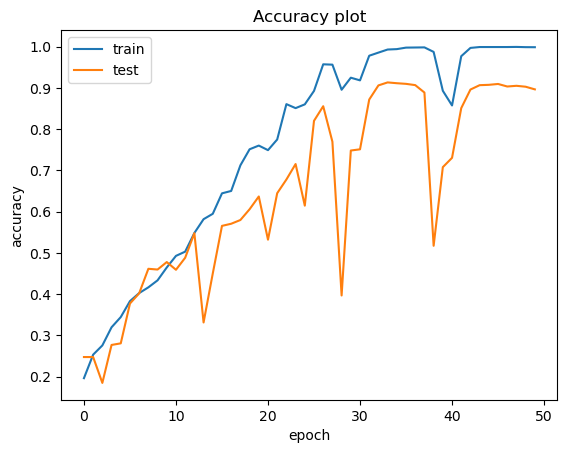

In [17]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Accuracy plot")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.savefig("emotion_model_accuracy.png")

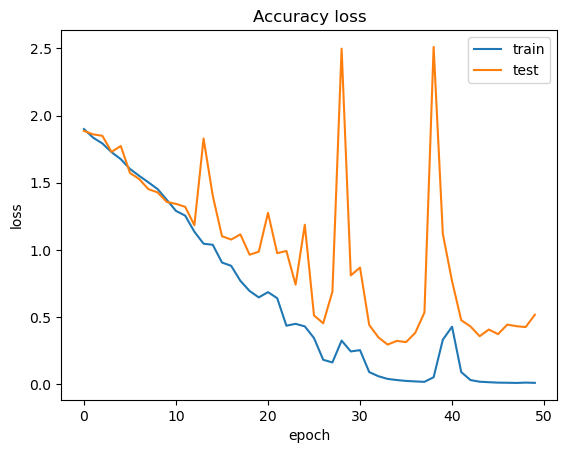

In [18]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Accuracy loss")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.savefig("emotion_model_loss.png")

In [19]:
predictions = model2.predict(test_set)
pred = np.argmax(predictions, axis = 1)
from sklearn.metrics import accuracy_score
print(accuracy_score(test_set.classes,pred))

0.8963499582056283


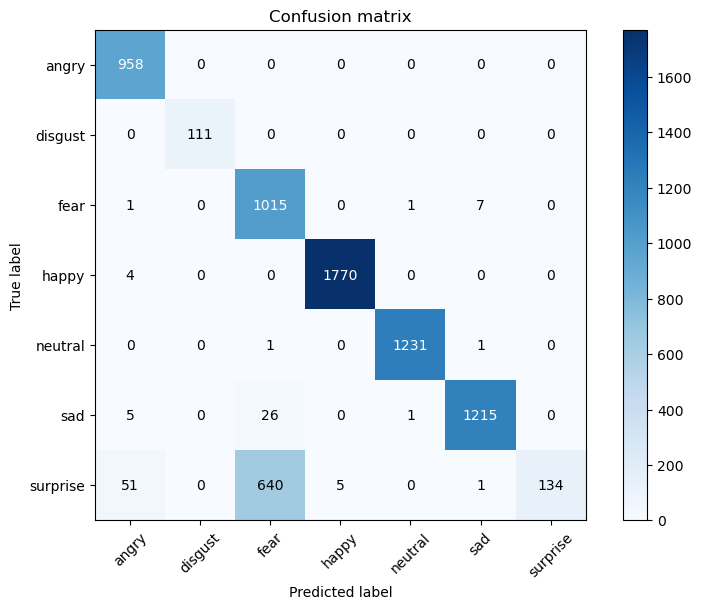

In [21]:
cm = confusion_matrix(test_set.classes, pred)
class_names = test_set.class_indices.keys()
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cm, classes=class_names)
plt.show()

## Модель_2

In [25]:
from keras.layers.convolutional import ZeroPadding2D, Convolution2D

In [26]:
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(48,48,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 50, 50, 1)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 48, 48, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 128)      

In [29]:
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_set ,validation_data = test_set , epochs=15, batch_size=64,
                                      steps_per_epoch=steps_per_epoch, validation_steps=validation_steps)

Epoch 1/15
112/112 [==============================] - 1359s 12s/step - loss: 1.9452 - accuracy: 0.2270 - val_loss: 1.8403 - val_accuracy: 0.2475
Epoch 2/15
112/112 [==============================] - 1208s 11s/step - loss: 1.8373 - accuracy: 0.2494 - val_loss: 1.8171 - val_accuracy: 0.2475
Epoch 3/15
112/112 [==============================] - 845s 8s/step - loss: 1.8155 - accuracy: 0.2404 - val_loss: 1.8155 - val_accuracy: 0.2475
Epoch 4/15
112/112 [==============================] - 764s 7s/step - loss: 1.8289 - accuracy: 0.2404 - val_loss: 1.8139 - val_accuracy: 0.2475
Epoch 5/15
112/112 [==============================] - 698s 6s/step - loss: 1.8243 - accuracy: 0.2494 - val_loss: 1.8136 - val_accuracy: 0.2475
Epoch 6/15
112/112 [==============================] - 610s 5s/step - loss: 1.8268 - accuracy: 0.2494 - val_loss: 1.8130 - val_accuracy: 0.2475
Epoch 7/15
112/112 [==============================] - 621s 6s/step - loss: 1.8264 - accuracy: 0.2404 - val_loss: 1.8137 - val_accuracy: 0.

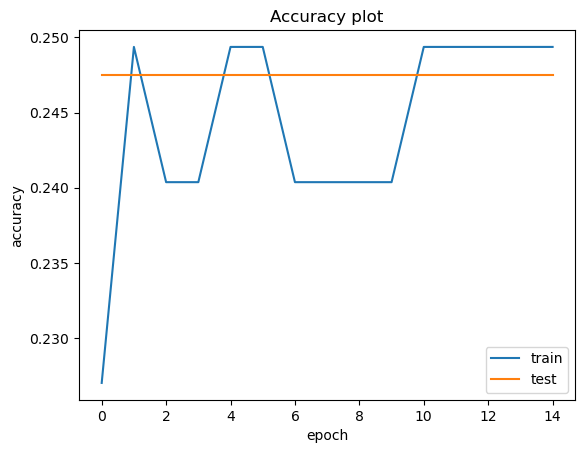

In [30]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Accuracy plot")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.savefig("emotion_model_accuracy.png")

In [31]:
from sklearn.metrics import accuracy_score

predictions = model.predict(test_set)
pred = np.argmax(predictions, axis = 1)
print(accuracy_score(test_set.classes,pred))

0.24714405126776262


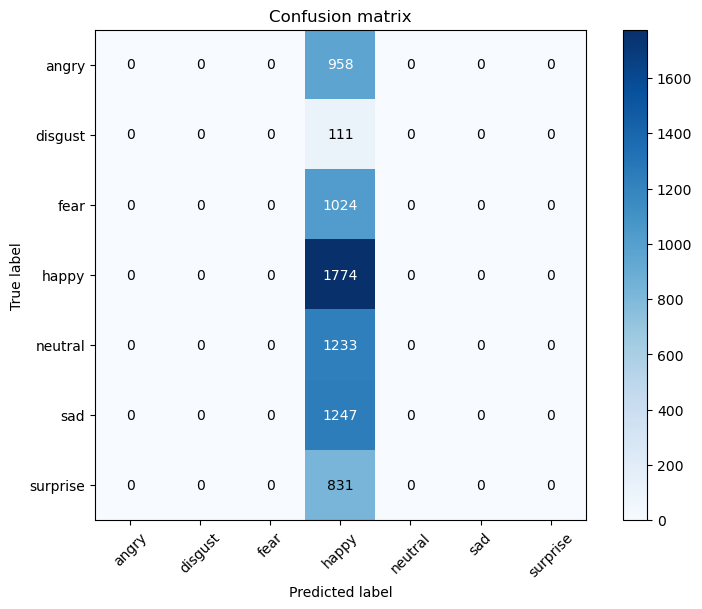

In [32]:
cm = confusion_matrix(test_set.classes, pred)
class_names = test_set.class_indices.keys()
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cm, classes=class_names)
plt.show()